EXAMPLES

Plate 200×300 mm (origin='centroid')
  A      = 60000 mm^2
  C      = (0.0, 0.0) mm
  Ix, Iy = 450000000, 200000000 mm^4    Ixy = 0 mm^4
  Wx±    = 3000000 / 3000000 mm^3    Wy± = 2000000 / 2000000 mm^3
  rx, ry = 86.6, 57.7 mm      Sx,Sy = 2250000, 1500000 mm^3
  Ix about bottom edge (y=-H/2): 1800000000 mm^4

Full props() (all length-based units are in mm):
A        = 60,000.00
Cx       = 0.00
Cy       = 0.00
Ix       = 450,000,000.00
Iy       = 200,000,000.00
Ip       = 650,000,000.00
Ixy      = 0.00
rx       = 86.60
ry       = 57.74
Sx_max   = 2,250,000.00
Sy_max   = 1,500,000.00
Wx_plus  = 3,000,000.00
Wx_minus = 3,000,000.00
Wy_plus  = 2,000,000.00
Wy_minus = 2,000,000.00


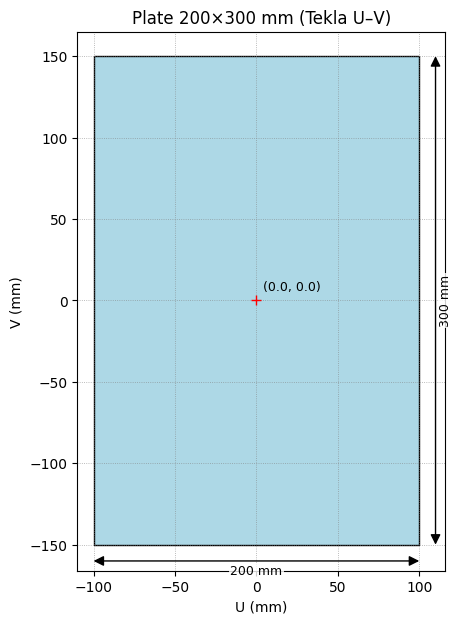

In [1]:
# Plate section (Tekla U–V): build geometry, compute properties, print key results, plot with annotations.
# Inputs : B, H [mm], origin {"centroid"|"top"|"bottom"}.
# Output : A [mm^2], Cx/Cy [mm], Ix/Iy/Ixy [mm^4], Wx/Wy [mm^3], rx/ry [mm], Sx/Sy [mm^3] + plot (centroid + bbox).

from xsprops import plate, props, props_at_point, pretty, plot_section                 # geometry + section properties + formatter + plot
from xsprops_plot import init_plot, annotate_title, annotate_centroid, annotate_bbox  # plotting helpers
import matplotlib.pyplot as plt                                                       # render figure

B, H   = 200.0, 300.0                            # [mm]
ORIGIN = "centroid"                              # "centroid" | "top" | "bottom"

sec = plate(width=B, height=H, origin=ORIGIN)    # centroid at (0,0) for ORIGIN="centroid"
p   = props(sec)                                 # centroidal section properties (Tekla U–V)

p_bot = props_at_point(sec, x0=0.0, y0=-H / 2)   # example: inertia about bottom edge (y = -H/2)

print(f"Plate {B:.0f}×{H:.0f} mm (origin='{ORIGIN}')")
print(f"  A      = {p['A']:.0f} mm^2")
print(f"  C      = ({p['Cx']:.1f}, {p['Cy']:.1f}) mm")
print(f"  Ix, Iy = {p['Ix']:.0f}, {p['Iy']:.0f} mm^4    Ixy = {p['Ixy']:.0f} mm^4")
print(f"  Wx±    = {p['Wx_plus']:.0f} / {p['Wx_minus']:.0f} mm^3    Wy± = {p['Wy_plus']:.0f} / {p['Wy_minus']:.0f} mm^3")
print(f"  rx, ry = {p['rx']:.1f}, {p['ry']:.1f} mm      Sx,Sy = {p['Sx_max']:.0f}, {p['Sy_max']:.0f} mm^3")
print(f"  Ix about bottom edge (y=-H/2): {p_bot['Ix_0']:.0f} mm^4\n")
print("Full props() (all length-based units are in mm):")
print(pretty(p, n=2))

fig, ax = init_plot(figsize=(7, 7), show_axes=True, show_grid=True)                   # engineer-friendly view
plot_section(sec, ax=ax, face="lightblue", edge="black", linewidth=1.0)               # section fill + outline
annotate_centroid(ax, p, show_marker=True, show_text=True)                             # centroid marker + label
annotate_bbox(ax, sec, pad=10.0, fmt="{:.0f} mm")                                      # overall B/H dimensions

annotate_title(ax, "Plate {B:.0f}×{H:.0f} mm (Tekla U–V)", {"B": B, "H": H}, fontsize=12)
ax.set_xlabel("U (mm)")                                                               # Tekla naming
ax.set_ylabel("V (mm)")

plt.show()



I-beam (mm): B=200, H=300, tw=8, tf=12, r1=15
  Centroid C      = (-0.0, 0.0) mm   A=7206 mm^2
  Centroidal Ix/Iy= 117189789/16024241 mm^4     Wx-=781265 mm^3
  Point Pbot      = (-0.0, -150.0) mm  (bottom surface)
  About Pbot Ix_0/Iy_0 = 279317473/16024241 mm^4


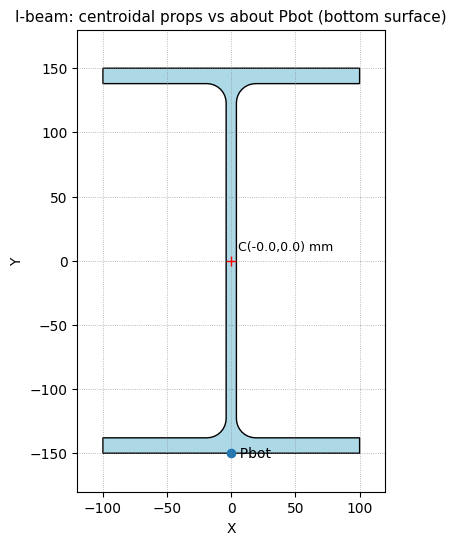

In [2]:
# I-beam: compare centroidal section props vs props about a point on the bottom surface.
# props()          -> Ix/Iy/Ixy, Wx/Wy about centroid C = (Cx, Cy)
# props_at_point() -> Ix_0/Iy_0/Ixy_0 about axes through Pbot = (x0, y0) (parallel to U/V)

from xsprops      import i_beam, props, props_at_point                               # geometry + properties (centroid / about point)
from xsprops_plot import plot_section_with_style, annotate_title, annotate_centroid  # plot helpers
import matplotlib.pyplot as plt                                                      # render

d   = {"B": 200.0, "H": 300.0, "tw": 8.0, "tf": 12.0, "r1": 15.0}                    # [mm]
sec = i_beam(b=d["B"], h=d["H"], tw=d["tw"], tf=d["tf"], r1=d["r1"])                 # section in Tekla U–V, centroid ~ (0,0)

p   = props(sec)                                                                      # centroidal props (about Cx,Cy)
x0  = p["Cx"]                                                                         # choose point under centroid line (U = Cx)
y0  = sec.bounds[1]                                                                   # bottom surface coordinate (Vmin)
p0  = props_at_point(sec, x0=x0, y0=y0)                                               # props about Pbot(x0,y0), axes || U/V

print(f"I-beam (mm): B={d['B']:.0f}, H={d['H']:.0f}, tw={d['tw']:.0f}, tf={d['tf']:.0f}, r1={d['r1']:.0f}")
print(f"  Centroid C      = ({p['Cx']:.1f}, {p['Cy']:.1f}) mm   A={p['A']:.0f} mm^2")
print(f"  Centroidal Ix/Iy= {p['Ix']:.0f}/{p['Iy']:.0f} mm^4     Wx-={p['Wx_minus']:.0f} mm^3")
print(f"  Point Pbot      = ({x0:.1f}, {y0:.1f}) mm  (bottom surface)")
print(f"  About Pbot Ix_0/Iy_0 = {p0['Ix_0']:.0f}/{p0['Iy_0']:.0f} mm^4")

fig, ax = plot_section_with_style(sec, show_axes=True, show_grid=True)               # show Tekla U–V
annotate_title(ax, "I-beam: centroidal props vs about Pbot (bottom surface)", fontsize=11)
annotate_centroid(ax, p, text_fmt="C({Cx:.1f},{Cy:.1f}) mm")                         # mark centroid
ax.scatter([x0], [y0], s=35)                                                         # mark Pbot
ax.text(x0, y0, "  Pbot", va="center")                                               # label

plt.show()


I-beam after apply_tekla_position (all props, mm-based units):
A        = 7,205.67
Cx       = 124.84
Cy       = -195.27
Ix       = 27,858,362.09
Iy       = 105,355,668.16
Ip       = 133,214,030.25
Ixy      = 32,513,980.47
rx       = 62.18
ry       = 120.92
Sx_max   = 174,415.84
Sy_max   = 408,843.76
Wx_plus  = 191,766.53
Wx_minus = 191,766.53
Wy_plus  = 601,496.52
Wy_minus = 601,496.52


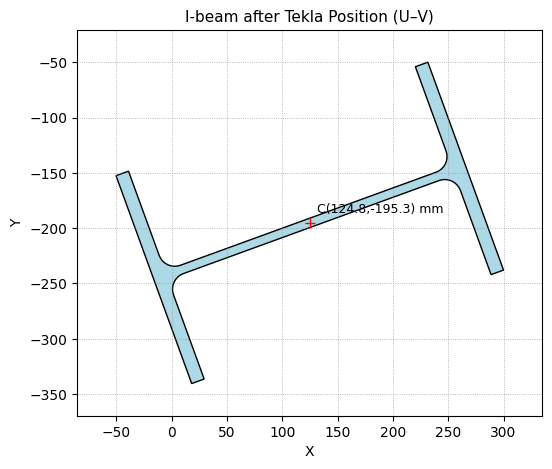

In [3]:
# I-beam + Tekla Position:
# - apply_tekla_position(): rotate about (0,0) (Tekla convention: centroid at (0,0)), then align by bbox faces, then add offsets.
# - props(): returns ALL centroidal section properties of the positioned geometry (units are mm-based: mm^2, mm^3, mm^4).

from xsprops      import i_beam, apply_tekla_position, props, pretty                   # geometry + Tekla positioning + properties + formatter
from xsprops_plot import plot_section_with_style, annotate_title, annotate_centroid    # plot + annotations
import matplotlib.pyplot as plt                                                       # render

beam_pos = apply_tekla_position(
    i_beam(b=200, h=300, tw=8, tf=12, r1=15),                                         # [mm] base section (centroid at (0,0))
    plane="FRONT",  plane_offset=300,                                                 # FRONT face -> U=0, then +300 mm in +U
    rotation="FRONT", rotation_offset=20,                                             # rotate to FRONT (-90°) + extra +20° roll
    depth="TOP",    depth_offset=-50                                                  # TOP face -> V=0, then -50 mm in V
)

p = props(beam_pos)                                                                    # centroidal properties about C=(Cx,Cy) of beam_pos

print("I-beam after apply_tekla_position (all props, mm-based units):")
print(pretty(p, n=2))                                                                  # prints everything computed by props()

fig, ax = plot_section_with_style(beam_pos, show_axes=True, show_grid=True)            # positioned section in global U–V
annotate_title(ax, "I-beam after Tekla Position (U–V)", fontsize=11)
annotate_centroid(ax, p, text_fmt="C({Cx:.1f},{Cy:.1f}) mm")
plt.show()



GROSS (all props, mm-based units):
A        = 20,000.00
Cx       = 0.00
Cy       = 0.00
Ix       = 66,666,666.67
Iy       = 16,666,666.67
Ip       = 83,333,333.33
Ixy      = 0.00
rx       = 57.74
ry       = 28.87
Sx_max   = 500,000.00
Sy_max   = 250,000.00
Wx_plus  = 666,666.67
Wx_minus = 666,666.67
Wy_plus  = 333,333.33
Wy_minus = 333,333.33

NET (all props, mm-based units):
A        = 17,600.00
Cx       = 0.00
Cy       = 2.73
Ix       = 61,255,757.58
Iy       = 16,586,666.67
Ip       = 77,842,424.24
Ixy      = 0.00
rx       = 59.00
ry       = 30.70
Sx_max   = 451,280.99
Sy_max   = 244,000.00
Wx_plus  = 629,732.09
Wx_minus = 596,294.99
Wy_plus  = 331,733.33
Wy_minus = 331,733.33

Reduction:  A_net/A_gross=0.880   Ix_net/Ix_gross=0.919   Iy_net/Iy_gross=0.995


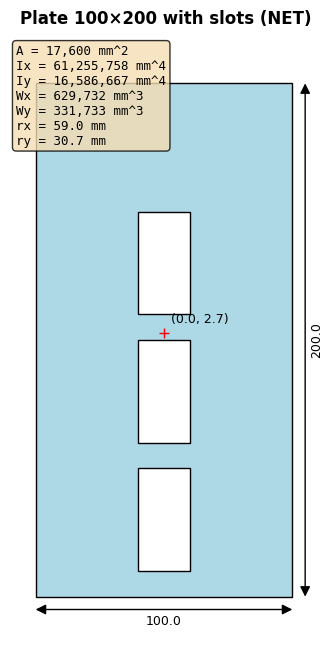

In [4]:
# Plate with slots: gross vs net section properties (all props() keys) + net plot.
# Units   : mm, mm^2, mm^3, mm^4
# Note    : net = gross - holes (difference); props() is always centroidal (about Cx,Cy of current geometry)

from xsprops      import plate, series_holes, props, pretty                               # geometry + hole pattern + properties + formatter
from xsprops_plot import plot_profile_with_props                                          # plot + centroid + bbox + small props box
import matplotlib.pyplot as plt                                                           # render

gross = plate(100, 200)                                                                   # 100×200 mm plate, centroid at (0,0)
holes = series_holes(plate_width=20, hole_height=40, e1=-50, p1=50, n1=2)                 # 3 slots (n1 = N-1); top edges at V=+50,0,-50
net   = gross.difference(holes) if holes else gross                                       # subtract slots (if any)

p_g   = props(gross)                                                                      # gross centroidal properties (about Cg)
p_n   = props(net)                                                                        # net centroidal properties (about Cn)

print("GROSS (all props, mm-based units):")
print(pretty(p_g, n=2))
print("\nNET (all props, mm-based units):")
print(pretty(p_n, n=2))
print(f"\nReduction:  A_net/A_gross={p_n['A']/p_g['A']:.3f}   Ix_net/Ix_gross={p_n['Ix']/p_g['Ix']:.3f}   Iy_net/Iy_gross={p_n['Iy']/p_g['Iy']:.3f}")

plot_profile_with_props(net, p_n, title="Plate 100×200 with slots (NET)")                 # plot net geometry + centroid + bbox + key props
plt.show()




A        = 42,460.93
Cx       = -0.00
Cy       = 0.00
Ix       = 247,097,726.81
Iy       = 134,616,545.02
Ip       = 381,714,271.83
Ixy      = -0.00
rx       = 76.29
ry       = 56.31
Sx_max   = 1,426,183.85
Sy_max   = 1,061,523.36
Wx_plus  = 1,976,781.81
Wx_minus = 1,976,781.81
Wy_plus  = 1,346,165.45
Wy_minus = 1,346,165.45


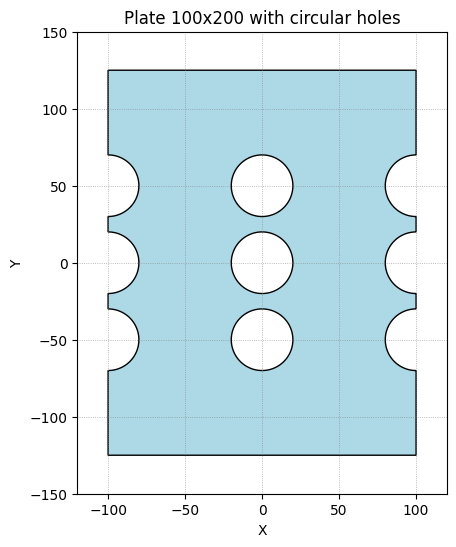

In [5]:
# === 3. REDUCTION DUE TO CIRCULAR HOLES ===
from xsprops import plate, grid_circles, props, pretty  # geometry + circular holes + properties
from xsprops_plot import plot_section_with_style, annotate_title  # plotting helpers
import matplotlib.pyplot as plt  # plotting

base = plate(200,250)  # base plate 100x200 mm, centroid at (0,0)
holes = grid_circles(diam=40, e1=-50, p1=50, n1=2, e2=-100, d1=100, n2=2) # 2x2 grid of circular holes
net_section = base if holes is None else base.difference(holes)  # subtract holes

p_net = props(net_section)  # net properties
print(pretty(p_net, n=2))  # all properties

fig, ax = plot_section_with_style(net_section, face="lightblue", edge="black", show_axes=True, show_grid=True)
annotate_title(ax, "Plate 100x200 with circular holes", fontsize=12)
plt.show()


Composite (all props, mm-based units):
A        = 14,705.67
Cx       = 0.00
Cy       = -28.05
Ix       = 293,869,000.98
Iy       = 55,086,741.00
Ip       = 348,955,741.98
Ixy      = 0.00
rx       = 141.36
ry       = 61.20
Sx_max   = 996,913.92
Sy_max   = 357,314.29
Wx_plus  = 1,562,714.08
Wx_minus = 2,070,234.73
Wy_plus  = 440,693.93
Wy_minus = 440,693.93


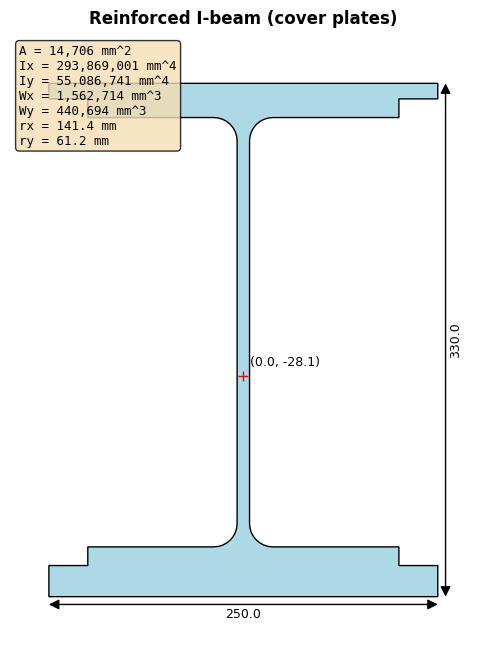

In [6]:
# Reinforced I-beam: add top/bottom cover plates (union), then compute full centroidal props() and plot.
# Placement rule (Tekla U–V): top plate centroid at +H/2 + t_top/2, bottom plate centroid at -H/2 - t_bot/2.

from xsprops      import i_beam, plate, translate, props, pretty                      # geometry + move + properties + formatter
from xsprops_plot import plot_profile_with_props                                     # plot + centroid + bbox + key props box
import matplotlib.pyplot as plt                                                      # render

beam = i_beam(b=200, h=300, tw=8, tf=12, r1=15)                                      # [mm] base I-beam (centroid ~ (0,0))
sec  = beam.union(                                                                    # composite = beam + plates (cover plates)
    translate(plate(250, 10), 0, +300/2 + 10/2)                                       # top plate: width=250, thickness=10, above top face
).union(
    translate(plate(250, 20), 0, -300/2 - 20/2)                                       # bottom plate: width=250, thickness=20, below bottom face
)

p   = props(sec)                                                                      # ALL centroidal properties of the composite (about Cx,Cy)
p0  = props(beam)                                                                     # reference: bare beam (for quick gain ratios)

print("Composite (all props, mm-based units):")
print(pretty(p, n=2))

plot_profile_with_props(sec, p, title="Reinforced I-beam (cover plates)")             # plot composite + centroid + bbox + key props
plt.show()



Composite (all props, mm-based units):
A        = 14,705.67
Cx       = 0.00
Cy       = -28.05
Ix       = 293,869,000.98
Iy       = 55,086,741.00
Ip       = 348,955,741.98
Ixy      = 0.00
rx       = 141.36
ry       = 61.20
Sx_max   = 996,913.92
Sy_max   = 357,314.29
Wx_plus  = 1,562,714.08
Wx_minus = 2,070,234.73
Wy_plus  = 440,693.93
Wy_minus = 440,693.93


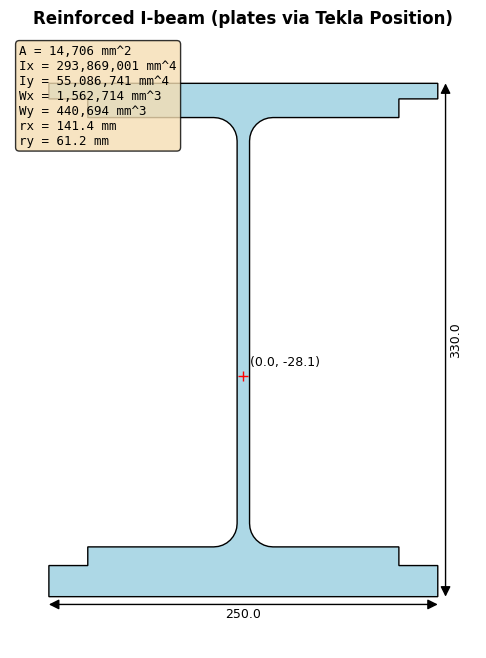

In [7]:
# Reinforced I-beam (no translate):
# - Plates are positioned by apply_tekla_position() using face alignment + offsets in Tekla U–V.
# - depth="BELOW"  -> moves plate bottom face to V=0, then depth_offset shifts it to +H/2 (top face of beam).
# - depth="TOP"    -> moves plate top face    to V=0, then depth_offset shifts it to -H/2 (bottom face of beam).
# - props()        -> ALL centroidal properties of the resulting composite section.

from xsprops      import i_beam, plate, apply_tekla_position, props, pretty            # geometry + Tekla Position + properties + formatter
from xsprops_plot import plot_profile_with_props                                      # plot + centroid + bbox + key props box
import matplotlib.pyplot as plt                                                        # render

sec = i_beam(b=200, h=300, tw=8, tf=12, r1=15).union(                                  # base beam (centroid ~ (0,0))
    apply_tekla_position(                                                               # TOP plate placement (no translate)
        plate(250, 10),                                                                 # [mm] width=250, thickness=10 (centroid at 0,0)
        plane="MIDDLE",  plane_offset=0,                                                # keep centered in U
        rotation="TOP",  rotation_offset=0,                                             # no roll
        depth="BELOW",   depth_offset=+300/2                                            # bottom face -> +H/2  => centroid at +H/2 + t/2
    )
).union(
    apply_tekla_position(                                                               # BOTTOM plate placement (no translate)
        plate(250, 20),                                                                 # [mm] width=250, thickness=20
        plane="MIDDLE",  plane_offset=0,                                                # keep centered in U
        rotation="TOP",  rotation_offset=0,                                             # no roll
        depth="TOP",     depth_offset=-300/2                                            # top face -> -H/2     => centroid at -H/2 - t/2
    )
)

p = props(sec)                                                                          # ALL centroidal props of composite (about Cx,Cy)

print("Composite (all props, mm-based units):")
print(pretty(p, n=2))

plot_profile_with_props(sec, p, title="Reinforced I-beam (plates via Tekla Position)")
plt.show()



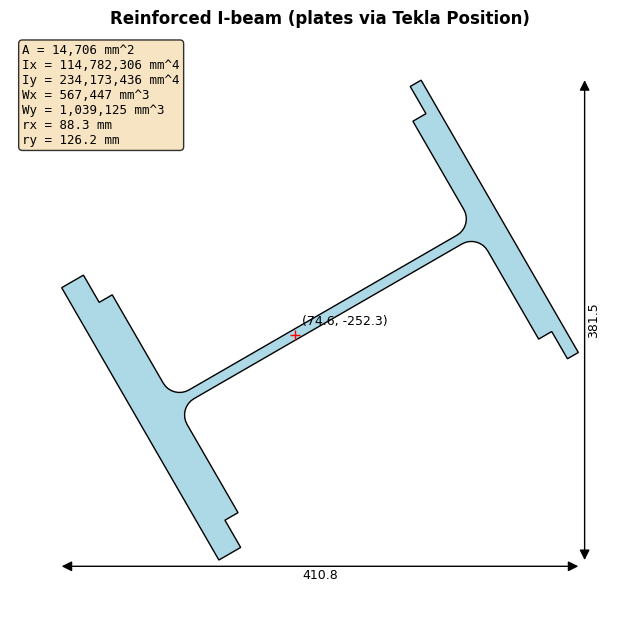

In [8]:
# Reinforced I-beam (no translate): place plates via Tekla Position, union, then one global Tekla Position for the whole composite.
# Note: props() is centroidal about C of the current geometry; global Tekla Position rotates about (0,0) before align/offset.

from xsprops      import i_beam, plate, apply_tekla_position, props, pretty
from xsprops_plot import plot_profile_with_props
import matplotlib.pyplot as plt

sec = i_beam(b=200, h=300, tw=8, tf=12, r1=15).union(
    apply_tekla_position(plate(250, 10), plane="MIDDLE", plane_offset=0, rotation="TOP", rotation_offset=0, depth="BELOW", depth_offset=+300/2)
).union(
    apply_tekla_position(plate(250, 20), plane="MIDDLE", plane_offset=0, rotation="TOP", rotation_offset=0, depth="TOP",   depth_offset=-300/2)
)

sec = apply_tekla_position(
    sec,
    plane="FRONT",  plane_offset=300,
    rotation="FRONT", rotation_offset=30,
    depth="TOP",    depth_offset=-50
)

p = props(sec)

plot_profile_with_props(sec, p, title="Reinforced I-beam (plates via Tekla Position)")
plt.show()


Bolt group (centroidal, weighted by bolt_area):
  N=6   A_bolt=314 mm^2   A_total=1884 mm^2   spanU=50 mm   spanV=120 mm
  C=(25.0, 60.0) mm
  Ix=4521600 mm^4   Iy=1177500 mm^4   Ixy=0 mm^4   Ip=5699100 mm^4


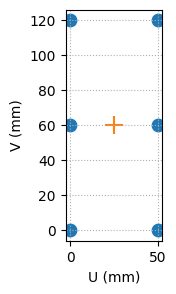

In [9]:
# Bolt group: generate (x,y) bolt coordinates, compute centroidal inertias (weighted by bolt_area), print ALL results, plot points + centroid.
# Units    : mm, mm^2, mm^4
# Math     : C = mean(x,y);  Ix = A_bolt * Σ(dy²);  Iy = A_bolt * Σ(dx²);  Ixy = A_bolt * Σ(dx·dy);  Ip = Ix + Iy

from xsprops import create_bolt_group_geometry, calculate_bolt_group_properties              # bolt layout + bolt-group props
import matplotlib.pyplot as plt                                                             # plot

bp = calculate_bolt_group_properties(                                                       # centroidal bolt-group properties
    create_bolt_group_geometry(                                                             # origin (0,0) = bottom-left bolt
        row_dist=60,            num_rows=3,                                                  # rows in +V (mm)
        bolt_pitch_in_row=50,  num_bolts_per_row=2,                                          # bolts in row in +U (mm)
        # num_bolts_last_row=1                                                              # optional: different top row
    ),
    bolt_area=314                                                                            # [mm^2] area of ONE bolt (weight)
)

xs, ys = zip(*bp["coords"]) if bp["coords"] else ([], [])                                   # split coords for plot/extents
U, V   = (max(xs) - min(xs), max(ys) - min(ys)) if xs else (0.0, 0.0)                       # group size [mm]
A_tot  = bp["N"] * 314                                                                       # total "weight" area [mm^2]

print("Bolt group (centroidal, weighted by bolt_area):")
print(f"  N={bp['N']}   A_bolt=314 mm^2   A_total={A_tot:.0f} mm^2   spanU={U:.0f} mm   spanV={V:.0f} mm")
print(f"  C=({bp['Cx']:.1f}, {bp['Cy']:.1f}) mm")
print(f"  Ix={bp['Ix']:.0f} mm^4   Iy={bp['Iy']:.0f} mm^4   Ixy={bp['Ixy']:.0f} mm^4   Ip={bp['Ip']:.0f} mm^4")

fig, ax = plt.subplots(figsize=(5, 3))                                                      # plot
ax.scatter(xs, ys, s=80)                                                                     # bolt points
ax.scatter([bp["Cx"]], [bp["Cy"]], marker="+", s=160)                                        # centroid marker
ax.set_aspect("equal", adjustable="box"); ax.grid(True, linestyle=":")                       # view style
ax.set_xlabel("U (mm)"); ax.set_ylabel("V (mm)")                                             # axes
plt.show()



I-beam with opening (mm-based units):
  C=(0.0,2.3) mm   A=6886 mm^2
  Sx_max=426729 mm^3   Sy_max=122619 mm^3


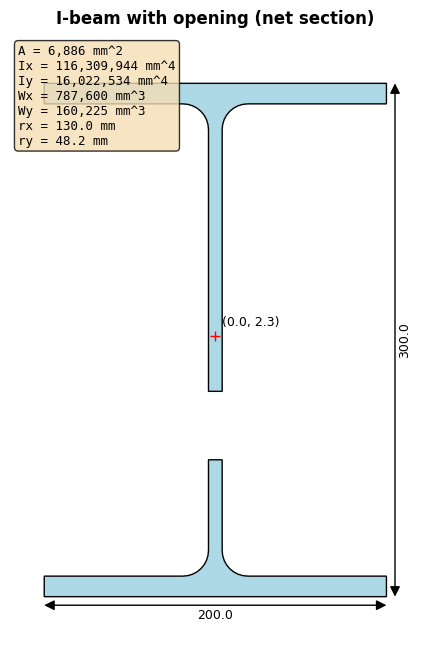

In [10]:
# Static moment for shear (Q): cut a hole -> net section -> props() -> print Sx_max / Sy_max (mm^3) + plot net geometry.
# Note: props() returns centroidal values; Sx_max/Sy_max are max first moments used in shear stress formulas.

from xsprops      import i_beam, plate, props                                          # geometry + properties
from shapely.affinity import translate                                                 # place the opening
from xsprops_plot import plot_profile_with_props                                       # plot + centroid + bbox + key props box
import matplotlib.pyplot as plt                                                        # render

sec = i_beam(b=200, h=300, tw=8, tf=12, r1=15).difference(                             # net section = beam - opening
    translate(plate(20, 40), 0, -50)                                                   # opening: 20×40 mm, shifted by V=-50 mm
)

p = props(sec)                                                                         # centroidal props of net section (about Cx,Cy)

print("I-beam with opening (mm-based units):")
print(f"  C=({p['Cx']:.1f},{p['Cy']:.1f}) mm   A={p['A']:.0f} mm^2")
print(f"  Sx_max={p['Sx_max']:.0f} mm^3   Sy_max={p['Sy_max']:.0f} mm^3")             # first moments (for shear)

plot_profile_with_props(sec, p, title="I-beam with opening (net section)")             # shows centroid + bbox + key values
plt.show()


Box section (two channels, all props, mm-based units):
A        = 8,974.51
Cx       = 78.35
Cy       = -0.00
Ix       = 122,914,380.19
Iy       = 63,499,658.88
Ip       = 186,414,039.07
Ixy      = 0.00
rx       = 117.03
ry       = 84.12
Sx_max   = 481,088.57
Sy_max   = 351,587.82
Wx_plus  = 819,429.20
Wx_minus = 819,429.20
Wy_plus  = 604,758.66
Wy_minus = 604,758.66


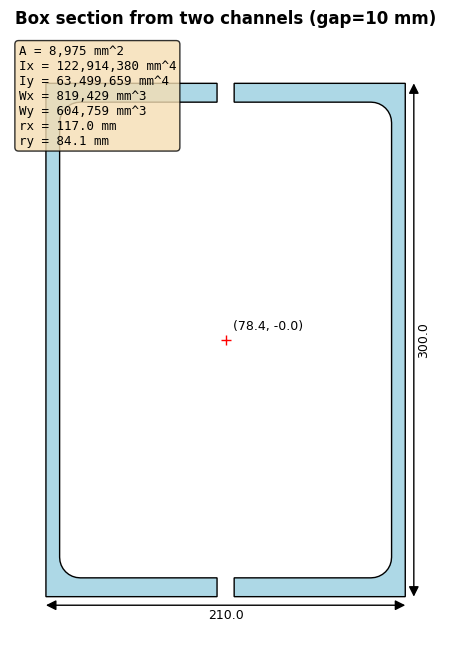

In [11]:
# Box from two channels: mirror one channel, shift by gap using bbox, union, then print ALL props() and plot.
# Units: mm, mm^2, mm^3, mm^4. Axes: Tekla U (x) / V (y).

from xsprops      import channel, props, pretty                                       # geometry + properties + formatter
from shapely.affinity import scale, translate                                         # mirror + shift
from xsprops_plot import plot_profile_with_props                                      # plot + centroid + bbox + key props box
import matplotlib.pyplot as plt                                                       # render

gap = 10.0                                                                            # [mm] clear gap between channels

sec = channel(h=300, b=100, tw=8, tf=11, r1=12).union(                                # CH1 at (0,0) + CH2 mirrored and shifted
    translate(
        scale(channel(h=300, b=100, tw=8, tf=11, r1=12), xfact=-1, yfact=1, origin=(0, 0)),   # CH2 mirrored about V-axis
        xoff=(channel(h=300, b=100, tw=8, tf=11, r1=12).bounds[2] + gap)                       # move CH2 so it clears CH1 by 'gap'
             - scale(channel(h=300, b=100, tw=8, tf=11, r1=12), xfact=-1, yfact=1, origin=(0, 0)).bounds[0],
        yoff=0
    )
)

p = props(sec)                                                                        # ALL centroidal props of the composite

print("Box section (two channels, all props, mm-based units):")
print(pretty(p, n=2))

plot_profile_with_props(sec, p, title="Box section from two channels (gap=10 mm)")
plt.show()



Channel (all props, mm-based units):
A        = 4,487.26
Cx       = 0.00
Cy       = -0.00
Ix       = 61,457,190.09
Iy       = 4,202,036.55
Ip       = 65,659,226.64
Ixy      = 0.00
rx       = 117.03
ry       = 30.60
Sx_max   = 240,544.29
Sy_max   = 59,186.52
Wx_plus  = 409,714.60
Wx_minus = 409,714.60
Wy_plus  = 57,285.51
Wy_minus = 157,689.84


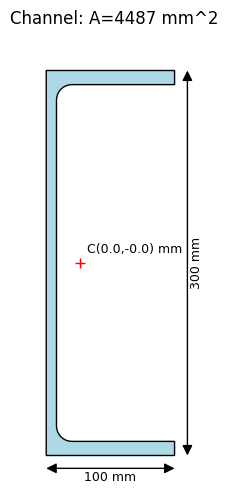

In [12]:
# Channel: compute ALL props() (centroidal) and plot overall dimensions (bbox) + centroid.
# Units: mm, mm^2, mm^3, mm^4.

from xsprops      import channel, props, pretty
from xsprops_plot import plot_section_with_style, annotate_title, annotate_bbox, annotate_centroid
import matplotlib.pyplot as plt

sec = channel(h=300, b=100, tw=8, tf=11, r1=12)                                       # [mm] channel in Tekla U–V
p   = props(sec)                                                                       # ALL centroidal properties about C=(Cx,Cy)

print("Channel (all props, mm-based units):")
print(pretty(p, n=2))

fig, ax = plot_section_with_style(sec, show_axes=False, show_grid=False)               # clean view
annotate_title(ax, "Channel: A={A:.0f} mm^2", params=p, fontsize=12)                   # show area in title
annotate_bbox(ax, sec, pad=10.0, fmt="{:.0f} mm")                                      # overall H/B from bbox
annotate_centroid(ax, p, text_fmt="C({Cx:.1f},{Cy:.1f}) mm")                           # centroid marker + label
plt.show()



NET (all props, mm-based units):
A        = 4,800.00
Cx       = 0.00
Cy       = 1.25
Ix       = 36,922,500.00
Iy       = 160,000.00
Ip       = 37,082,500.00
Ixy      = 0.00
rx       = 87.71
ry       = 5.77
Sx_max   = 183,625.00
Sy_max   = 12,000.00
Wx_plus  = 248,218.49
Wx_minus = 244,115.70
Wy_plus  = 16,000.00
Wy_minus = 16,000.00


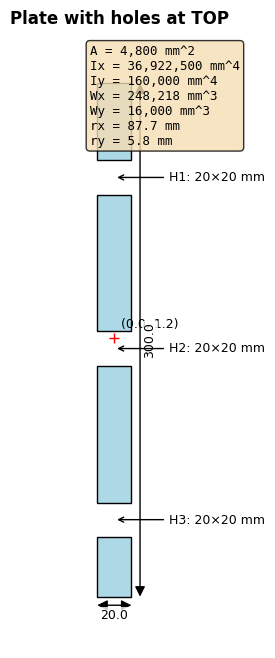

In [13]:
# Plate + hole series at TOP (Pylance-safe):
# - series_holes(...) may return None -> translate(None) is invalid, so we branch.
# - We shift the hole pattern by +H/2 so "top reference" sits at the plate top edge (+V).
# - Net section = gross plate minus holes; props() returns ALL centroidal properties of the NET geometry.

from xsprops import plate, series_holes, props, pretty                                         # geometry + hole pattern + properties + formatter
from xsprops_plot import plot_profile_with_props, annotate_arrow_text                           # plot + callouts
from shapely.affinity import translate                                                          # shift holes to top edge
import matplotlib.pyplot as plt                                                                  # render

B, H = 20.0, 300.0                                                                              # [mm] plate width/height
b, h = 20.0, 20.0                                                                               # [mm] hole width/height
e1, p1, n1 = 45.0, 100.0, 2                                                                     # [mm] first offset, pitch, spaces (holes=n1+1)

base  = plate(B, H)                                                                             # gross plate, centroid at (0,0)
holes = series_holes(plate_width=b, hole_height=h, e1=e1, p1=p1, n1=n1)                         # holes in local coords (may be None)
sec   = base if holes is None else base.difference(translate(holes, 0.0, +H/2))                  # shift holes to TOP, then subtract

p = props(sec)                                                                                  # ALL centroidal net properties (about Cx,Cy)

print("NET (all props, mm-based units):")
print(pretty(p, n=2))                                                                           # prints everything props() computes

plot_profile_with_props(sec, p, title="Plate with holes at TOP")                                # plot net + centroid + bbox + key values
ax = plt.gca()                                                                                  # get current axes for annotations

for i in range(int(n1) + 1):                                                                    # annotate each hole center (global coords)
    y = (+H/2 - (e1 + i * p1)) - h / 2                                                          # y_center = y_top - h/2, with y_top=H/2-(e1+i*p1)
    annotate_arrow_text(ax, text=f"H{i+1}: {b:.0f}×{h:.0f} mm", xy=(0.0, y), xytext=(60.0, y))   # label at hole center

plt.show()



Composite (all props, mm-based units):
A        = 50,881.58
Cx       = 11.17
Cy       = 0.00
Ix       = 308,381,232.31
Iy       = 234,477,203.56
Ip       = 542,858,435.86
Ixy      = -0.00
rx       = 77.85
ry       = 67.88
Sx_max   = 1,698,477.47
Sy_max   = 1,486,429.47
Wx_plus  = 2,055,874.88
Wx_minus = 2,055,874.88
Wy_plus  = 1,241,730.88
Wy_minus = 2,109,194.72


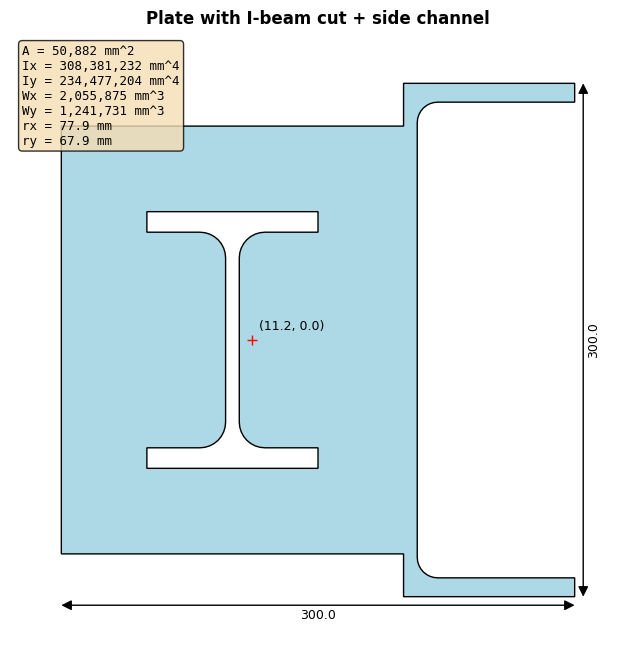

In [14]:
# Composite example: plate with an I-beam void + side channel (bbox-aligned) -> props() -> print ALL -> plot.
# Steps:
# 1) cut:   plate - i_beam
# 2) place: channel next to plate using bbox (gap)
# 3) union: (cut plate) + (shifted channel)
# Units: mm, mm^2, mm^3, mm^4. props() is centroidal about C of the final composite.

from xsprops      import plate, i_beam, channel, props, pretty                              # geometry + properties + formatter
from shapely.affinity import translate                                                      # move channel by bbox
from xsprops_plot import plot_profile_with_props                                            # plot + centroid + bbox + key props box
import matplotlib.pyplot as plt                                                              # render

gap = 0.0                                                                                    # [mm] clearance between plate and channel

sec = plate(200, 250).difference(i_beam(b=100, h=150, tw=8, tf=12, r1=15)).union(             # cut plate + side channel
    translate(
        channel(h=300, b=100, tw=8, tf=11, r1=12),                                           # channel at (0,0) before shifting
        xoff=(plate(200, 250).bounds[2] + gap) - channel(h=300, b=100, tw=8, tf=11, r1=12).bounds[0],  # align channel left to plate right
        yoff=0.0
    )
)

p = props(sec)                                                                               # ALL centroidal properties of the composite

print("Composite (all props, mm-based units):")
print(pretty(p, n=2))

plot_profile_with_props(sec, p, title="Plate with I-beam cut + side channel")                # plot + centroid + bbox + key values
plt.show()



Angle (all props, mm-based units):
A        = 2,431.63
Cx       = 0.00
Cy       = -0.00
Ix       = 2,030,216.69
Iy       = 5,616,944.31
Ip       = 7,647,161.00
Ixy      = -1,956,442.00
rx       = 28.89
ry       = 48.06
Sx_max   = 29,179.82
Sy_max   = 51,733.42
Wx_plus  = 26,575.79
Wx_minus = 86,002.36
Wy_plus  = 55,220.40
Wy_minus = 116,337.76


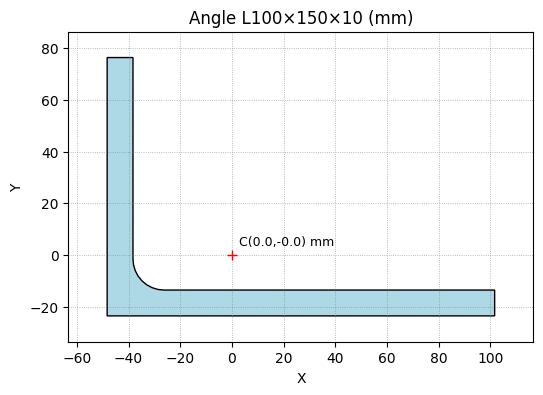

In [15]:
# Angle: print ALL props() to console; plot only geometry + centroid (no text on plot).
# Units: mm, mm^2, mm^3, mm^4.

from xsprops      import angle, props, pretty
from xsprops_plot import plot_section_with_style, annotate_title, annotate_centroid
import matplotlib.pyplot as plt

sec = angle(h=100, b=150, t=10, r1=12)                                            # [mm] L100×150×10
p   = props(sec)                                                                    # ALL centroidal properties about C=(Cx,Cy)

print("Angle (all props, mm-based units):")
print(pretty(p, n=2))                                                               # full list as text

fig, ax = plot_section_with_style(sec, show_axes=True, show_grid=True)              # plot geometry only
annotate_title(ax, "Angle L100×150×10 (mm)", fontsize=12)
annotate_centroid(ax, p, text_fmt="C({Cx:.1f},{Cy:.1f}) mm")                        # centroid marker (optional label)
plt.show()


A        = 1,330.72
Cx       = 66.69
Cy       = 26.14
Ix       = 1,167,120.49
Iy       = 1,205,520.74
Ip       = 2,372,641.23
Ixy      = 245,206.96
rx       = 29.62
ry       = 30.10
Sx_max   = 18,129.26
Sy_max   = 17,088.49
Wx_plus  = 20,526.34
Wx_minus = 40,053.23
Wy_plus  = 33,204.50
Wy_minus = 17,297.33


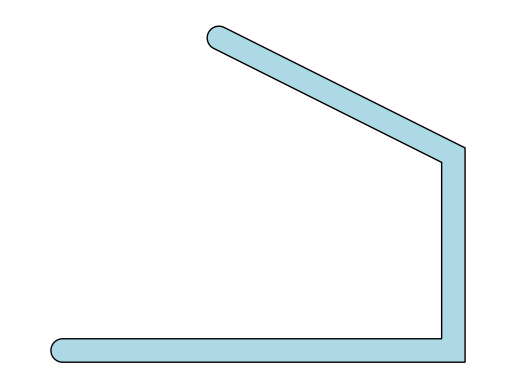

In [16]:
# Polyline -> thin-wall AREA section via Shapely buffer().
# t/2          : buffer distance (half thickness) -> total thickness = t
# cap_style    : line ENDS     = "flat" | "square" | "round"
# join_style   : line CORNERS  = "mitre" | "bevel" | "round"
# props(sec)   : centroidal section properties of the AREA (mm-based units)

from shapely.geometry import LineString
from xsprops import props, pretty, plot_section
import matplotlib.pyplot as plt

t = 6.0                                                                                   # [mm] wall thickness
sec = LineString([(0, 0), (100, 0), (100, 50), (40, 80)]).buffer(                         # centerline polyline -> area strip
    t / 2,                                                                                # half-thickness offset
    cap_style="round",                                                                     # END shape: flat (no extra length)
    join_style="mitre"                                                                    # CORNER shape: sharp (miter)
)

print(pretty(props(sec), n=2))                                                            # all props() results (mm-based units)
plot_section(sec); plt.axis("equal"); plt.show()                                          # quick view (true scale)




A        = 8,850.00
Cx       = 284.41
Cy       = 24.14
Ix       = 3,275,603.29
Iy       = 224,704,322.47
Ip       = 227,979,925.76
Ixy      = -4,862,780.82
rx       = 19.24
ry       = 159.34
Sx_max   = 71,810.92
Sy_max   = 615,537.23
Wx_plus  = 84,282.86
Wx_minus = 74,216.82
Wy_plus  = 792,345.41
Wy_minus = 790,082.64


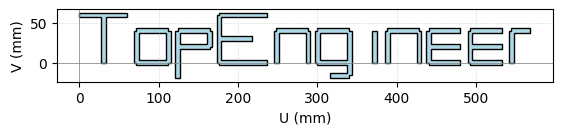

In [17]:
from shapely.geometry import LineString
from shapely.ops import unary_union
from xsprops import props, pretty, plot_section
import matplotlib.pyplot as plt

# Stick-letter strokes (unit box)
STROKES = {
    "T": [((0, 1), (1, 1)), ((0.5, 1), (0.5, 0))],
    "E": [((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 0.5), (0.7, 0.5)), ((0, 0), (1, 0))],
}

LOWER = {
    "o": [((0, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (0, 1)), ((0, 1), (0, 0))],
    "p": [((0, -0.5), (0, 1)), ((0, 1), (1, 1)), ((1, 1), (1, 0.5)), ((1, 0.5), (0, 0.5))],
    "e": [((0, 0.5), (1, 0.5)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 0), (1, 0))],
    "n": [((0, 0), (0, 1)), ((0, 1), (1, 1)), ((1, 1), (1, 0))],
    "g": [((0, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (0, 1)), ((0, 1), (0, 0)),
          ((1, 0), (1, -0.4)), ((1, -0.4), (0.4, -0.4))],
    "i": [((0.5, 0), (0.5, 1))],
    "r": [((0, 0), (0, 1)), ((0, 1), (0.6, 1))],
}


word = "TopEngineer"  # T and E are big (uppercase), others are small (lowercase)
size_big, size_small, spacing, t = 60, 40, 12, 6  # sizes and line thickness

geoms, x = [], 0.0
for ch in word:
    glyph = LOWER.get(ch, STROKES.get(ch.upper()))
    size = size_big if ch.isupper() else size_small
    for (x1, y1), (x2, y2) in glyph:
        geoms.append(LineString([(x + x1 * size, y1 * size), (x + x2 * size, y2 * size)])
                     .buffer(t / 2, cap_style='flat', join_style='mitre'))
    x += size * (0.6 if ch in "Ii" else 1.0) + spacing

geom = unary_union(geoms)
print(pretty(props(geom), n=2))
plot_section(geom, show_axes=True); plt.show()


VERIFICATION

In [18]:
# IPE 300 verification: compare xsprops props() with reference values (mapped to xsprops keys).
# ref values are entered already converted to xsprops units (mm-based) and mapped to xsprops names.

from xsprops import i_beam, props

d = {"b":150.0, "h":300.0, "tw":7.1, "tf":10.7, "r1":15.0}                                         # [mm] geometry (xsprops args)
ref = {                                                                                            # reference -> xsprops units
    "A": 53.81*100.0,                                                                              # cm^2 -> mm^2
    "Ix": 8356.00*1e4,  "Iy": 603.80*1e4,  "Ip": 8959.80*1e4,                                      # cm^4 -> mm^4
    "Sx_max": 314.20*1e3, "Sy_max": 6.262e4,                                                       # cm^3 -> mm^3
    "Wx_minus": 557.10*1e3, "Wy_minus": 80.50*1e3,                                                 # cm^3 -> mm^3
    "rx": 124.6, "ry": 33.5                                                                        # mm
}

p = props(i_beam(b=d['b'], h=d['h'], tw=d['tw'], tf=d['tf'], r1=d['r1']))

def pct(v, r): return 100.0 * (v - r) / r

print("IPE 300 (xsprops vs ref): value / ref (Δ%)")
for k in ["A","Ix","Iy","Ip","Sx_max","Sy_max","Wx_minus","Wy_minus","rx","ry"]:
    v, r = p[k], ref[k]
    print(f"  {k:<8}= {v:>12.3e} / {r:>12.3e}  ({pct(v,r):+.2f}%)")



IPE 300 (xsprops vs ref): value / ref (Δ%)
  A       =    5.386e+03 /    5.381e+03  (+0.09%)
  Ix      =    8.364e+07 /    8.356e+07  (+0.10%)
  Iy      =    6.038e+06 /    6.038e+06  (+0.00%)
  Ip      =    8.968e+07 /    8.960e+07  (+0.09%)
  Sx_max  =    3.145e+05 /    3.142e+05  (+0.09%)
  Sy_max  =    6.263e+04 /    6.262e+04  (+0.02%)
  Wx_minus=    5.576e+05 /    5.571e+05  (+0.09%)
  Wy_minus=    8.051e+04 /    8.050e+04  (+0.01%)
  rx      =    1.246e+02 /    1.246e+02  (+0.02%)
  ry      =    3.348e+01 /    3.350e+01  (-0.05%)


In [19]:
# UPE 270 verification: compare xsprops props() with reference values (mapped to xsprops keys).
# ref values are entered already converted to xsprops units (mm-based) and mapped to xsprops names.

from xsprops import channel, props

d = {"h":270.0, "b":95.0, "tw":7.5, "tf":13.5, "r1":15.0}                                          # [mm] geometry (xsprops args)
ref = {                                                                                             # reference -> xsprops units
    "A": 44.80*100.0,                                                                               # cm^2 -> mm^2
    "Ix": 5250.00*1e4,  "Iy": 401.00*1e4,  "Ip": 5651.00*1e4,                                       # cm^4 -> mm^4
    "Sx_max": 225.05*1e3, "Sy_max": 58.84*1e3,                                                       # cm^3 -> mm^3
    "Wx_minus": 389.00*1e3,                                                                          # cm^3 -> mm^3 (major elastic modulus)
    "rx": 108.0, "ry": 29.9                                                                          # mm
}

p = props(channel(h=d['h'], b=d['b'], tw=d['tw'], tf=d['tf'], r1=d['r1']))

def pct(v, r): return 100.0 * (v - r) / r

print("UPE 270 (xsprops vs ref): value / ref (Δ%)")
for k in ["A","Ix","Iy","Ip","Sx_max","Sy_max","Wx_minus","rx","ry"]:
    v, r = p[k], ref[k]
    print(f"  {k:<8}= {v:>12.3e} / {r:>12.3e}  ({pct(v,r):+.2f}%)")


UPE 270 (xsprops vs ref): value / ref (Δ%)
  A       =    4.486e+03 /    4.480e+03  (+0.14%)
  Ix      =    5.258e+07 /    5.250e+07  (+0.14%)
  Iy      =    4.011e+06 /    4.010e+06  (+0.02%)
  Ip      =    5.659e+07 /    5.651e+07  (+0.14%)
  Sx_max  =    2.257e+05 /    2.250e+05  (+0.28%)
  Sy_max  =    5.895e+04 /    5.884e+04  (+0.18%)
  Wx_minus=    3.894e+05 /    3.890e+05  (+0.12%)
  rx      =    1.083e+02 /    1.080e+02  (+0.24%)
  ry      =    2.990e+01 /    2.990e+01  (-0.00%)


In [20]:
# 2L 203x152x22.2x12 verification: build section from two angles, then compare props() with reference.
# ref values are entered already converted to xsprops units (mm-based) and mapped to xsprops names.

from xsprops import angle, props
from shapely.affinity import translate, scale
from shapely.ops import unary_union

# --- geometry (mm)
ha   = 203.0      # long leg
ba   = 152.0      # short leg
t    = 22.2       # thickness
r1   = 25.9       # root radius (toe radius r2 is ignored if xsprops angle() doesn't support it)
gap  = 12.0       # distance between angle corners (matches 203 + 203 + 12 = 418 overall width)

# --- build one angle, then place 2x symmetrically (T-shaped built-up)
a0 = angle(h=ba, b=ha, t=t, r1=r1)                                                    # NOTE: h=vertical leg, b=horizontal leg

# shift so the outer corner sits at (0,0) to make placement predictable
minx, miny, maxx, maxy = a0.bounds
a = translate(a0, xoff=-minx, yoff=-miny)

# make legs go +x (right) and -y (down)
a = scale(a, xfact=1.0, yfact=-1.0, origin=(0.0, 0.0))

# right angle (corner at +gap/2), left angle mirrored (corner at -gap/2)
aR = translate(a, xoff=+gap/2, yoff=0.0)
aL = translate(scale(a, xfact=-1.0, yfact=1.0, origin=(0.0, 0.0)), xoff=-gap/2, yoff=0.0)

sec = unary_union([aL, aR])

# --- reference (from your screenshot), converted to xsprops units
ref = {
    "A": 148.00 * 100.0,                                                              # cm^2 -> mm^2
    "Ix": 2880.00 * 1e4,  "Iy": 13725.06 * 1e4,  "Ip": 16605.06 * 1e4,                # cm^4 -> mm^4
    "Sx_max": 132.83 * 1e3, "Sy_max": 526.33 * 1e3,                                   # cm^3 -> mm^3
    "rx": 44.1, "ry": 96.3                                                             # mm
}

p = props(sec)

def pct(v, r): 
    return 100.0 * (v - r) / r

print("2L 203x152x22.2x12 (xsprops vs ref): value / ref (Δ%)")
for k in ["A", "Ix", "Iy", "Ip", "Sx_max", "Sy_max", "rx", "ry"]:
    v, r = p[k], ref[k]
    print(f"  {k:<8}= {v:>12.3e} / {r:>12.3e}  ({pct(v, r):+.2f}%)")


2L 203x152x22.2x12 (xsprops vs ref): value / ref (Δ%)
  A       =    1.507e+04 /    1.480e+04  (+1.83%)
  Ix      =    2.882e+07 /    2.880e+07  (+0.07%)
  Iy      =    1.374e+08 /    1.373e+08  (+0.10%)
  Ip      =    1.662e+08 /    1.661e+08  (+0.09%)
  Sx_max  =    2.760e+05 /    1.328e+05  (+107.82%)
  Sy_max  =    5.388e+05 /    5.263e+05  (+2.36%)
  rx      =    4.373e+01 /    4.410e+01  (-0.84%)
  ry      =    9.548e+01 /    9.630e+01  (-0.86%)


<img src="Example 9_6.PNG">

In [21]:
# Verification: U-shaped area with cut-outs (Example 9.6 style)
# Reference (about point O): Ix = 46 m^4, Iy = 46.5 m^4, kx = 1.599 m, ky = 1.607 m
#
# Notes:
# - Units: meters (m). xsprops is unit-agnostic → outputs follow input units.
# - props(sec) returns centroidal properties (Cx, Cy, Ix, Iy, rx, ry).
# - props_at_point(sec, x0, y0) returns properties about point (x0, y0):
#   Ix_0, Iy_0, rx_0, ry_0, etc. Here point O = (0, 0).

from xsprops import rectangle, props, props_at_point

# --- Geometry (meters) --------------------------------------------------------
outer = rectangle(b=5.0, h=6.0, x0=-2.5, y0=-3.0)   # 5×6
cut_B = rectangle(b=4.0, h=2.0, x0=-2.0, y0=1.0)    # 4×2 (top void)
cut_C = rectangle(b=4.0, h=1.0, x0=-2.0, y0=-2.0)   # 4×1 (slot)

sec = outer.difference(cut_B).difference(cut_C)

# --- Properties ---------------------------------------------------------------
pc = props(sec)                           # centroidal (for centroid output)
pO = props_at_point(sec, x0=0.0, y0=0.0)  # about O(0,0) (for textbook check)

# --- Reference ---------------------------------------------------------------
ref = {
    "A":  18.0,   # m²
    "Ix": 46.0,   # m⁴  (about O)
    "Iy": 46.5,   # m⁴  (about O)
    "kx": 1.599,  # m   (about O)
    "ky": 1.607,  # m   (about O)
}

def pct(v, r):
    return 100.0 * (v - r) / r if r else 0.0

print("U-shaped area with cut-outs (xsprops vs reference)")
print("=" * 56)
print(f"  Centroid: Cx={pc['Cx']:+.3f} m, Cy={pc['Cy']:+.3f} m")
print("-" * 56)
print(f"  A   = {pO['A']:>8.2f} m²   / {ref['A']:>8.2f} m²   ({pct(pO['A'], ref['A']):+.2f}%)")
print(f"  Ix  = {pO['Ix_0']:>8.2f} m⁴   / {ref['Ix']:>8.2f} m⁴   ({pct(pO['Ix_0'], ref['Ix']):+.2f}%)")
print(f"  Iy  = {pO['Iy_0']:>8.2f} m⁴   / {ref['Iy']:>8.2f} m⁴   ({pct(pO['Iy_0'], ref['Iy']):+.2f}%)")
print(f"  kx  = {pO['rx_0']:>8.3f} m    / {ref['kx']:>8.3f} m    ({pct(pO['rx_0'], ref['kx']):+.2f}%)")
print(f"  ky  = {pO['ry_0']:>8.3f} m    / {ref['ky']:>8.3f} m    ({pct(pO['ry_0'], ref['ky']):+.2f}%)")


U-shaped area with cut-outs (xsprops vs reference)
  Centroid: Cx=+0.000 m, Cy=-0.556 m
--------------------------------------------------------
  A   =    18.00 m²   /    18.00 m²   (+0.00%)
  Ix  =    46.00 m⁴   /    46.00 m⁴   (+0.00%)
  Iy  =    46.50 m⁴   /    46.50 m⁴   (+0.00%)
  kx  =    1.599 m    /    1.599 m    (-0.02%)
  ky  =    1.607 m    /    1.607 m    (+0.02%)


<img src="Example 9_8.PNG">

In [22]:
# Verification: W360×57 + top plate (Example 9.8 style)
# Reference (about centroidal axis parallel to plate):
#   A = 11581 mm²,  Cy = +70.8 mm,  Ix = 257×10^6 mm⁴,  kx = 149 mm
#
# Notes:
# - Units: millimeters (mm). xsprops is unit-agnostic → outputs follow input units.
# - kx (radius of gyration) is returned by xsprops as rx.
# - The W-shape here is modeled with a simple i_beam geometry tuned to match handbook A and Ix closely.

from xsprops import i_beam, rectangle, props

# --- Geometry (mm) ------------------------------------------------------------
# Wide-flange (W360×57): overall depth 358 mm, flange width 172 mm
# tw/tf chosen so that A ≈ 7230 mm² and Ix ≈ 160.2e6 mm⁴ for the bare W-shape
w = i_beam(b=172.0, h=358.0, tw=8.0, tf=13.3, r1=0.0)

# Plate: 229 × 19 mm, centered on the W-shape, sitting on the top flange
plate = rectangle(b=229.0, h=19.0, x0=-229.0 / 2.0, y0=358.0 / 2.0)

# Composite section
sec = w.union(plate)

# --- Properties (centroidal) --------------------------------------------------
p = props(sec)

# --- Reference ----------------------------------------------------------------
ref = {
    "A":  11581.0,          # mm²
    "Cy": 70.8,             # mm
    "Ix": 257.0e6,          # mm⁴
    "kx": 149.0,            # mm  (xsprops: rx)
}

def pct(v, r):
    return 100.0 * (v - r) / r if r else 0.0

print("W360×57 + top plate (xsprops vs reference)")
print("=" * 56)
print(f"  Centroid: Cx={p['Cx']:+.1f} mm, Cy={p['Cy']:+.1f} mm")
print("-" * 56)
print(f"  A   = {p['A']:>10.1f} mm² / {ref['A']:>10.1f} mm² ({pct(p['A'],  ref['A']):+.2f}%)")
print(f"  Ix  = {p['Ix']:>10.3e} mm⁴ / {ref['Ix']:>10.3e} mm⁴ ({pct(p['Ix'], ref['Ix']):+.2f}%)")
print(f"  kx  = {p['rx']:>10.1f} mm  / {ref['kx']:>10.1f} mm  ({pct(p['rx'], ref['kx']):+.2f}%)")


W360×57 + top plate (xsprops vs reference)
  Centroid: Cx=+0.0 mm, Cy=+70.8 mm
--------------------------------------------------------
  A   =    11577.4 mm² /    11581.0 mm² (-0.03%)
  Ix  =  2.569e+08 mm⁴ /  2.570e+08 mm⁴ (-0.05%)
  kx  =      149.0 mm  /      149.0 mm  (-0.03%)


<img src="Example 10_5.PNG">

In [23]:
# Verification: Example 10.5 + 10.7 (composite Z-shape from 3 rectangles)
# Reference (centroidal axes):
#   Ix  = 2.90e9 mm^4
#   Iy  = 5.60e9 mm^4
#   Ixy = -3.00e9 mm^4

from xsprops import rectangle, props

# --- Geometry (mm) ------------------------------------------------------------
# Rectangle B: 600 × 100, centered at (0,0)
B = rectangle(b=600.0, h=100.0, x0=-300.0, y0=-50.0)

# Rectangle A: 100 × 300, attached to left end of B, above B
A = rectangle(b=100.0, h=300.0, x0=-300.0, y0=50.0)

# Rectangle D: 100 × 300, attached to right end of B, below B
D = rectangle(b=100.0, h=300.0, x0=200.0, y0=-350.0)

sec = A.union(B).union(D)

# --- Properties (centroidal) --------------------------------------------------
p = props(sec)

# --- Reference ----------------------------------------------------------------
ref = {
    "Ix":  2.90e9,   # mm^4
    "Iy":  5.60e9,   # mm^4
    "Ixy": -3.00e9,  # mm^4
}

def pct(v, r):
    return 100.0 * (v - r) / r if r else 0.0

print("Example 10.5 + 10.7 (xsprops vs reference)")
print("=" * 56)
print(f"  Centroid: Cx={p['Cx']:+.1f} mm, Cy={p['Cy']:+.1f} mm")
print("-" * 56)
print(f"  Ix  = {p['Ix']:>10.3e} mm⁴ / {ref['Ix']:>10.3e} mm⁴ ({pct(p['Ix'],  ref['Ix']):+.2f}%)")
print(f"  Iy  = {p['Iy']:>10.3e} mm⁴ / {ref['Iy']:>10.3e} mm⁴ ({pct(p['Iy'],  ref['Iy']):+.2f}%)")
print(f"  Ixy = {p['Ixy']:>10.3e} mm⁴ / {ref['Ixy']:>10.3e} mm⁴ ({pct(p['Ixy'], ref['Ixy']):+.2f}%)")


Example 10.5 + 10.7 (xsprops vs reference)
  Centroid: Cx=+0.0 mm, Cy=+0.0 mm
--------------------------------------------------------
  Ix  =  2.900e+09 mm⁴ /  2.900e+09 mm⁴ (+0.00%)
  Iy  =  5.600e+09 mm⁴ /  5.600e+09 mm⁴ (+0.00%)
  Ixy = -3.000e+09 mm⁴ / -3.000e+09 mm⁴ (-0.00%)
